In [1048]:
# 기본 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns  

# 데이터 가져오기 
import pandas as pd 
from sklearn import datasets

# 데이터 전처리 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 훈련 검증용 데이터 분리
from sklearn.model_selection import train_test_split

# 분류 모델 구축 
from sklearn.ensemble import RandomForestRegressor 

# 교차 검증
from sklearn.metrics import make_scorer ,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [1049]:
train = pd.read_csv("0929_실습파일/train.csv")
test = pd.read_csv("0929_실습파일/test.csv")

In [1050]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [1051]:
train.isnull().sum()[train.isnull().sum()>0] , test.isnull().sum()[test.isnull().sum()>0]

(LotFrontage      259
 Alley           1369
 MasVnrType         8
 MasVnrArea         8
 BsmtQual          37
 BsmtCond          37
 BsmtExposure      38
 BsmtFinType1      37
 BsmtFinType2      38
 Electrical         1
 FireplaceQu      690
 GarageType        81
 GarageYrBlt       81
 GarageFinish      81
 GarageQual        81
 GarageCond        81
 PoolQC          1453
 Fence           1179
 MiscFeature     1406
 dtype: int64,
 MSZoning           4
 LotFrontage      227
 Alley           1352
 Utilities          2
 Exterior1st        1
 Exterior2nd        1
 MasVnrType        16
 MasVnrArea        15
 BsmtQual          44
 BsmtCond          45
 BsmtExposure      44
 BsmtFinType1      42
 BsmtFinSF1         1
 BsmtFinType2      42
 BsmtFinSF2         1
 BsmtUnfSF          1
 TotalBsmtSF        1
 BsmtFullBath       2
 BsmtHalfBath       2
 KitchenQual        1
 Functional         2
 FireplaceQu      730
 GarageType        76
 GarageYrBlt       78
 GarageFinish      78
 GarageCars      

In [1052]:
train.isnull().sum()[train.isnull().sum()>0].size , test.isnull().sum()[test.isnull().sum()>0].size

(19, 33)

# 결측치 처리


In [1053]:
# 결측치 비율 확인
(train.isnull().sum()[train.isnull().sum()>0] / train.shape[0]).sort_values(ascending= False)*100
drop_list=((train.isnull().sum()[train.isnull().sum()>0] / train.shape[0]).sort_values(ascending= False)*100)[:11].index.values
train = train.drop(drop_list ,axis = 1)
test = test.drop(drop_list,axis = 1)

In [1055]:
(train.isnull().sum()[train.isnull().sum()>0] / train.shape[0]).sort_values(ascending= False)*100

BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [1056]:
(test.isnull().sum()[test.isnull().sum()>0] / test.shape[0]).sort_values(ascending= False)*100

BsmtCond        3.084304
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtFinType2    2.878684
BsmtFinType1    2.878684
MasVnrType      1.096642
MasVnrArea      1.028101
MSZoning        0.274160
Utilities       0.137080
Functional      0.137080
BsmtHalfBath    0.137080
BsmtFullBath    0.137080
Exterior1st     0.068540
Exterior2nd     0.068540
SaleType        0.068540
GarageArea      0.068540
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
KitchenQual     0.068540
GarageCars      0.068540
BsmtFinSF1      0.068540
dtype: float64

In [1057]:
y = train.iloc[:,-1]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [1058]:
train = train.drop('SalePrice',axis = 1)
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [1059]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [1060]:
# 먼저 카테고리형과 인트형 나눈다.
cate_col,int_col = [],[]
for index in train:
    if train[index].dtype == 'object':
        cate_col.append(index)
    else :
        int_col.append(index)
print(cate_col,int_col) 

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'] ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [1062]:
def ch_na(data,ind):
    nullcol,notnullcol = [],[]
    for i in ind:
        if data[i].isnull().sum() > 0:
            nullcol.append(i)
        else:
            notnullcol.append(i)
    for col in ind:
        idsna = data[col][data[col].isnull()].index.values
        ids = data[col][data[col].notnull()].index.values
        check = data[col].isnull().sum()

        if check > 0:
            datanotnulx = data.loc[ids,notnullcol]
            datanotnuly = data.loc[ids,col]

            datanullx = data.loc[idsna,notnullcol]

            rfrr = RandomForestRegressor(n_estimators= 100,n_jobs=-1,random_state= 42)
            rfrr.fit(datanotnulx,datanotnuly)
            datanully = rfrr.predict(datanullx)
            data.loc[idsna,col] = datanully
    print(data[ind].isnull().sum()[data[ind].isnull().sum()>0])
ch_na(train,int_col)

Series([], dtype: int64)


In [1063]:
ch_na(test,int_col),ch_na(train,int_col)

Series([], dtype: int64)
Series([], dtype: int64)


(None, None)

In [1064]:
from sklearn.ensemble import RandomForestClassifier

def ch_ob(data,cate_col):
    for col in cate_col:
        check = data[col].isnull().sum()
        if check >0:
            if 'None' in data[col].index.values:
                train[col] = data[col].fillna('None')
            elif 'No' in data[col].index.values:
                data[col] = data[col].fillna('No')
            else:
                dataNa = data.loc[data[col].isnull()]
                idx = data[data[col].isnull()].index.values
                datanotna = data.loc[data[col].notnull()]
                rf = RandomForestClassifier()
                rf.fit(datanotna[int_col],datanotna[col])
                pred = rf.predict(dataNa[int_col])
                data.loc[idx,col] = pred
    print(data.isnull().sum()[data.isnull().sum()>0])
# train NAN: No None 
# test NAN : 알수없는것(MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtQual,BsmtCond) None

In [1065]:
ch_ob(test,cate_col),ch_ob(train,cate_col)

Series([], dtype: int64)
Series([], dtype: int64)


(None, None)

<AxesSubplot:xlabel='SalePrice'>

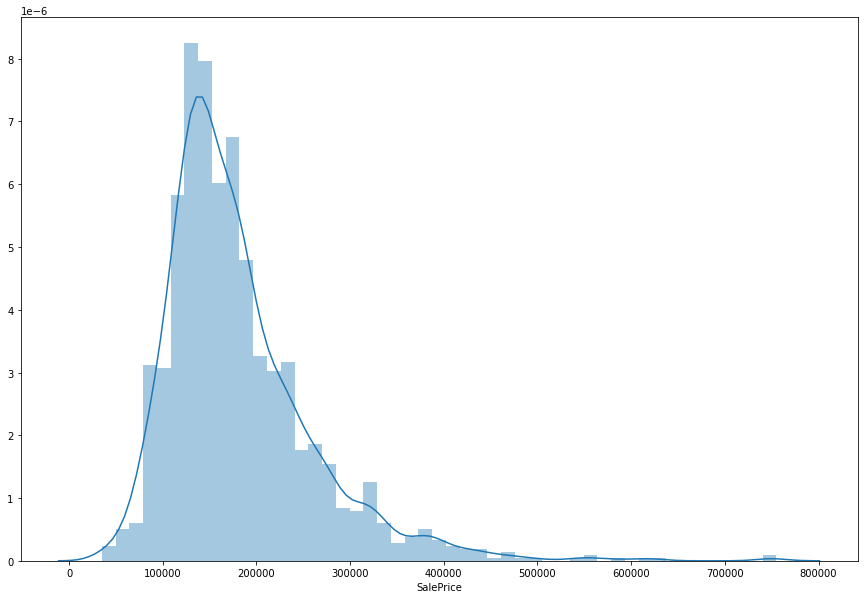

In [1066]:
plt.figure(figsize = (15,10))
sns.distplot(y)

In [1067]:
y.skew()

1.8828757597682129

<AxesSubplot:xlabel='SalePrice'>

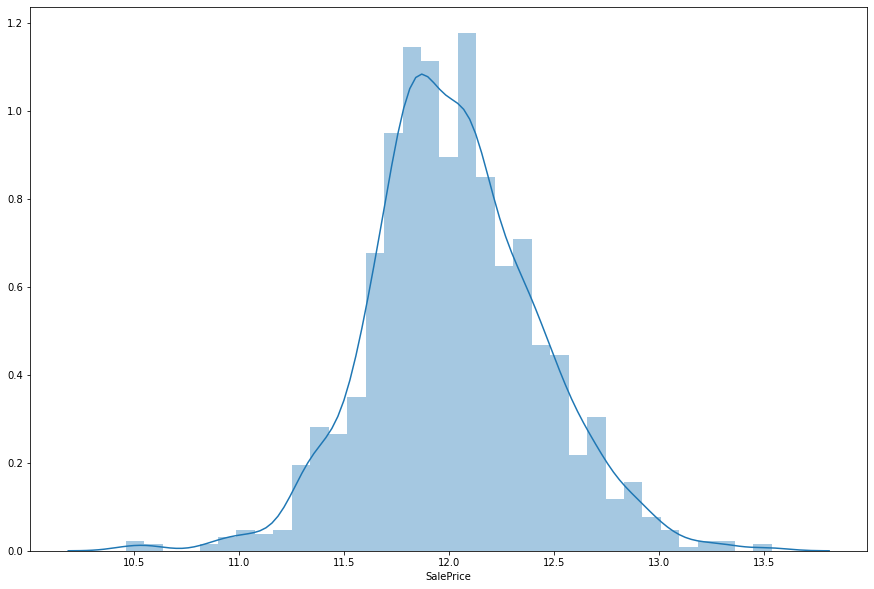

In [1068]:
log_y = np.log(y)
plt.figure(figsize = (15,10))
sns.distplot(log_y)

In [1069]:
log_y.skew()

0.12133506220520406

In [1070]:
# 데이터 표준화
st = StandardScaler()
train[int_col] = st.fit_transform(train[int_col])
test[int_col] = st.fit_transform(test[int_col])

In [1071]:
train[int_col]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510061,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.575006,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.321835,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.575006,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.362613,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.575006,-0.973018,-0.288653,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,1.723747,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.083785,0.759659,0.722112,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,1.726120,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.575006,-0.369871,-0.288653,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,1.728492,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.575006,-0.865548,6.092188,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [1072]:
test[int_col]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730864,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570610,0.063848,0.517278,...,1.185978,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905
1,-1.728490,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.040317,1.063710,-0.297970,...,-0.741178,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905
2,-1.726115,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570610,0.773640,-0.297970,...,0.042594,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905
3,-1.723741,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.457475,0.358313,-0.297970,...,-0.012732,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905
4,-1.721367,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570610,-0.386639,-0.297970,...,0.153244,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.570610,-0.964581,-0.297970,...,-2.179629,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,-1.359958
1455,1.723741,2.401505,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570610,-0.410811,-0.297970,...,-0.861049,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170,-1.359958
1456,1.726115,-0.874711,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570610,1.725156,-0.297970,...,0.475973,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053,-1.359958
1457,1.728490,0.646389,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570610,-0.224024,-0.297970,...,-2.179629,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827,0.329164,-1.359958


In [1073]:
qlist = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']
ca =[]
for i in cate_col:
    if i not in qlist:
        ca.append(i)
for j in qlist:
    train[j]=train[j].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
    test[j] = test[j].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
st = StandardScaler()
train[qlist] = st.fit_transform(train[qlist])
test[qlist] = st.fit_transform(test[qlist])

In [1074]:
categ = pd.get_dummies(train[ca])
categt = pd.get_dummies(test[ca])

In [1075]:
categt

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [1076]:
categ

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [1077]:
# test 데이터 없는 열 추가 
for i in categ:
    if i not in categt.columns.values:
        print(i)

Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_Floor
Heating_OthW
Electrical_Mix


In [1078]:
categt =  categ.copy()
datas = pd.get_dummies(test[ca])
tcol = datas.columns.values
categt[tcol] = datas
cols='''Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_Floor
Heating_OthW
Electrical_Mix'''.split("\n")
categt[cols] = 0

In [1079]:
int_col =  int_col+['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']
int_col

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual']

In [1080]:
x = pd.concat([train[int_col],categ],axis =1)
xt = pd.concat([test[int_col],categt],axis =1)

In [1081]:
xt

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570610,0.063848,0.517278,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.728490,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.040317,1.063710,-0.297970,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.726115,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570610,0.773640,-0.297970,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.723741,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.457475,0.358313,-0.297970,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.721367,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570610,-0.386639,-0.297970,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.723741,2.401505,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570610,-0.410811,-0.297970,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,1.726115,-0.874711,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570610,1.725156,-0.297970,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,1.728490,0.646389,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570610,-0.224024,-0.297970,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.730864,0.061351,-0.038790,0.641347,-0.497418,0.712392,0.489377,-0.038878,0.701122,-0.297970,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1083]:
xt = xt.drop(index = 1459)
x = x.drop('Id',axis = 1)
xt = xt.drop('Id',axis = 1)

In [1085]:
x.shape,xt.shape

((1460, 229), (1459, 229))

In [1086]:
kfold = KFold(n_splits=10,shuffle=True, random_state=42)

In [1088]:
score_rmse = make_scorer(mean_squared_error,False)

In [1089]:
xtrain,xtest,ytrain,ytest = train_test_split(x,log_y)
rfr = RandomForestRegressor(n_estimators= 1000,n_jobs=-1,random_state= 42)
rfr.fit(xtrain,ytrain)
y_pred = rfr.predict(xtest)
score = np.sqrt(-cross_val_score(rfr,xtrain,ytrain,cv = kfold,scoring =score_rmse) )

In [1090]:
score

array([0.11482463, 0.17782319, 0.1614649 , 0.14451891, 0.14375753,
       0.16640116, 0.13844962, 0.1400842 , 0.12977385, 0.14926458])

In [1091]:
score.mean()

0.1466362579661135

Text(0, 0.5, 'y_pred')

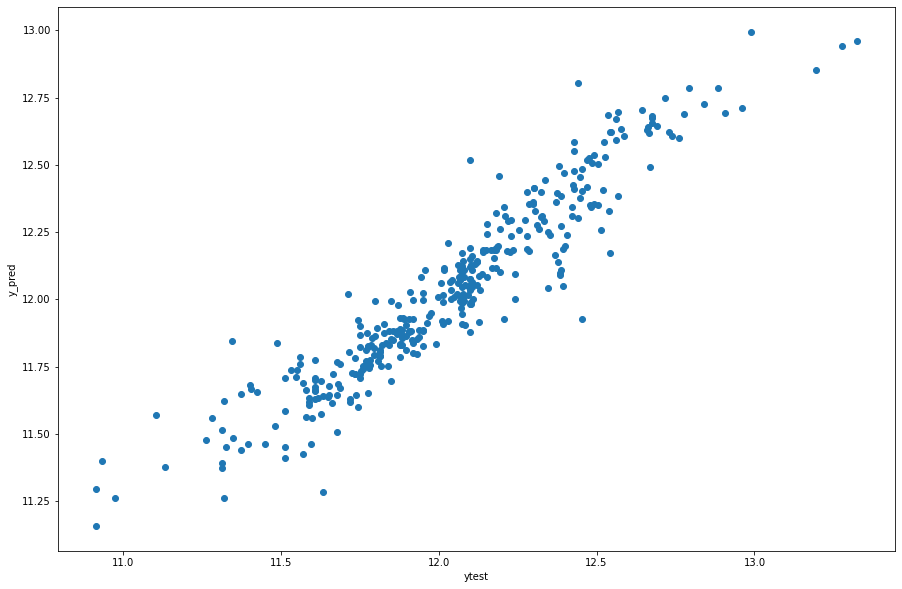

In [1092]:
plt.figure(figsize=(15,10))
plt.scatter(ytest,y_pred)
plt.xlabel('ytest')
plt.ylabel('y_pred')

In [1093]:
yt = rfr.predict(xt)

In [1094]:
sam = pd.read_csv("0929_실습파일/sample_submission.csv")
sam['SalePrice'] = np.exp(yt)
sam

,Id,SalePrice
0,1461,127200.387037
1,1462,156625.114915
2,1463,182256.591790
3,1464,188919.749300
4,1465,188478.662882
...,...,...
1454,2915,85851.936147
1455,2916,85952.923097
1456,2917,158992.140452
1457,2918,116531.232148


In [1095]:
sam.to_csv('sub.csv',index = False)